In [30]:
import pandas as pd, numpy as np,seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [3]:
df = pd.read_csv('/kaggle/input/dataframe/dataframe_.csv')

<h2 id="2">Step 2:   Analysis </h2>


In [4]:
# PRINTING top 3 rows
df.sample(3)

,input,output
538,93.864329,7.762689
1059,116.614886,105.609348
676,-27.972030,-60.640736


In [5]:
# checking the infoformation about dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
# descriptive statistics
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


# Conclusions

1. Standard deviation is 79 whereas the MEAN is 1.15 which means the values are far from mean.
2. maximum value is 134, & Q3 is 70.2.
3. 25% of the values are less than -63.3 , 50% of the values are less than value 10  & 75% of the values are less than the value 70.

4. For Output Coulmn, mean value is -34, max is 134.
5. Minimum and maximum values of above independent and dependent variables are almost same.

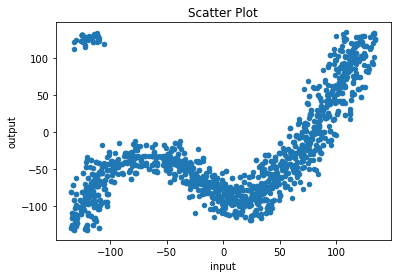

In [7]:
# checking the Relationship

df.plot(kind = 'scatter', x= 'input', y='output')
plt.title('Scatter Plot')
plt.show()

Text(0.5, 1.0, 'Histogram')

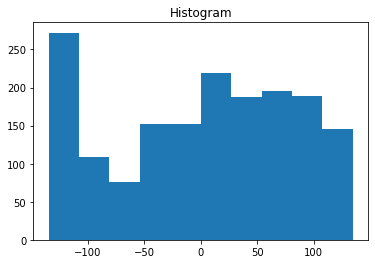

In [8]:
plt.hist([df['input']])
plt.title('Histogram')

<AxesSubplot:xlabel='input'>

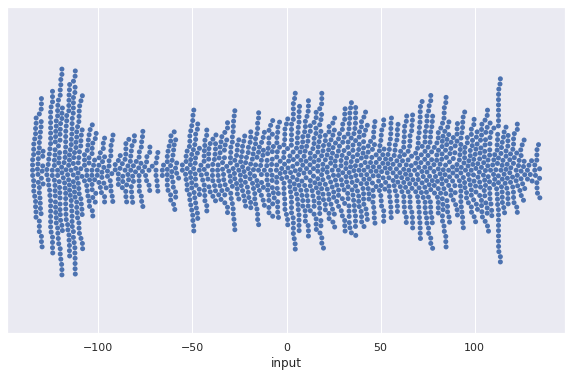

In [9]:
# Spread the  values for continuous variable to avoid overlap

sns.set(rc ={'figure.figsize' : (10,6)})
sns.swarmplot(x=df['input'])

<h2 id="3 , 4">Step 3 , 4:   Feature Engineering & Building Machine learning Model </h2>


In [10]:
df.isnull().sum()

input     1
output    1
dtype: int64

Since We don't know The Reason (Missing at Random or missing not at random) for these Missing Value & As there is Only One missing value I'm Going to drop.

In [11]:
df.dropna(inplace=True)

# Outlier Detection

<AxesSubplot:xlabel='input'>

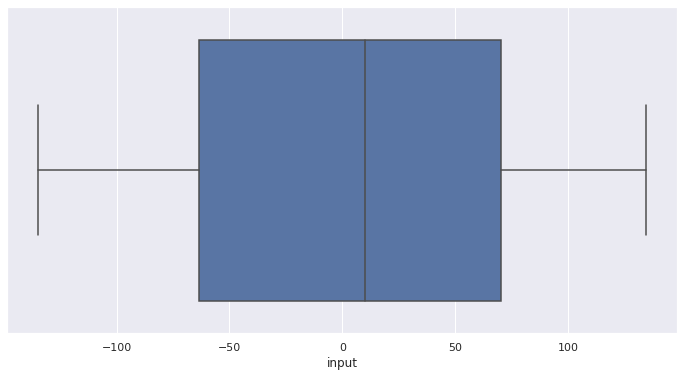

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='input')

# Feature SCaling

In [13]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [14]:
df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df_scaled.sample(3)

,input,output
1627,0.162640,-1.154903
1001,0.734420,0.110346
1146,-1.525988,-0.698263


# Building Model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
model = LinearRegression()
X = df.drop('output',axis=1)
y= df.output

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=250, shuffle=True)

model.fit(X_train,y_train)

pred = model.predict(X_test)


# Model Evaluation 

In [17]:
print('Mean Absolute Error :' , mean_absolute_error(y_test,pred))

Mean Absolute Error : 41.66240477898292


In [18]:
print("MSE",mean_squared_error(y_test,pred))

MSE 3114.469519415962


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='output', ylabel='Density'>

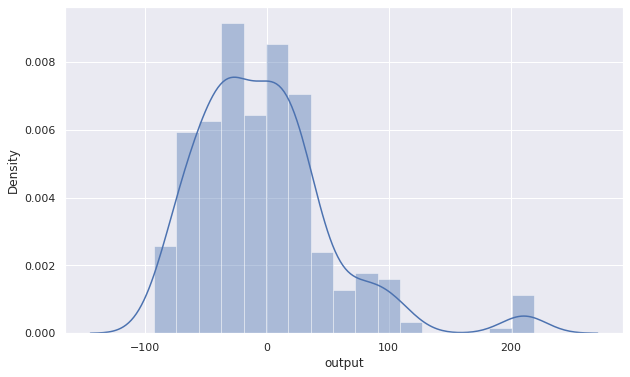

In [19]:
# we can see the actual values vs predicted values 
sns.distplot(y_test-pred)

# Step 5 : Comparing ALL Models

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [36]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-3220.8996518320228


In [40]:
ridge_predict=ridge_regressor.predict(X_test)

print('mean_squared_error:  ', mean_squared_error(y_test, ridge_predict))

print ('absolute_ error:', mean_absolute_error(y_test,ridge_predict))

mean_squared_error:   3114.4680773421637
absolute_ error: 41.66237447503465


In [41]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.693e+06, tolerance: 4.617e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.752e+06, tolerance: 4.750e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [43]:
lasso_predict=lasso_regressor.predict(X_test)

print('mean_squared_error:  ', mean_squared_error(y_test, lasso_predict))

print ('absolute_ error:', mean_absolute_error(y_test,lasso_predict))

mean_squared_error:   3114.4695194159626
absolute_ error: 41.66240477898292


In [48]:
knn = KNeighborsRegressor()

n_neighbors = list(range(1,30))

weights=('uniform','distance')

In [49]:
hyperparameters = dict( n_neighbors=n_neighbors, weights=weights)

knn = RandomizedSearchCV(knn, hyperparameters, cv=5)

knn.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'weights': ('uniform', 'distance')})

In [50]:
knn_predict=knn.predict(X_test)

print('mean_squared_error:  ', mean_squared_error(y_test, knn_predict))

print ('absolute_ error:', mean_absolute_error(y_test,knn_predict))

mean_squared_error:   1321.9175631412031
absolute_ error: 13.65922008180327


In [52]:
 data_dict = {'Model': ['Ridge', 'Lasso', 'LinearRegression', 'KNN'],
             'MAE': [41.6, 41, 47.66, 13.6],
             'MSE': [3114,3114,3114,1321] }

df = pd.DataFrame(data=data_dict)

df.head()

,Model,MAE,MSE
0,Ridge,41.60,3114
1,Lasso,41.00,3114
2,LinearRegression,47.66,3114
3,KNN,13.60,1321


OUT of all model KNN is better performance